# Problem Statement

* This project understands how the student's performance (test score) is affected by the other variables such as Gender, Ethnicity, Parental level of education, Luch and Test prepration course.

# Data Collection

* The data consists of 8 column and 1000 rows.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as pandas DataFrame

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


 ### Shape of the dataset

In [5]:
df.shape

(1000, 8)

# Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data types
* Check the number of unique values of each column
* Check statistics of dataset
* Check various categories present in the different categorical column


### Check Missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Check duplicate values

In [8]:
df.duplicated().sum()

0

There are no duplicate values in the data set

### Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check the number of unique values in each column

In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Check statistics of dataset

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**

* The means of all the numerical data range from 66 to 69.1
* The standard deviations for all the numerical data range from 14.6 to 15.19
* The minimum score for maths is 0, while the minimum scores for reading and writing are 17 and 15, respectively.

## Exploring Data

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
# Define numerical and categorical columns
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
cateogrical_features = df.select_dtypes(include=['object']).columns.tolist()

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} cateogrical features: {}'.format(len(cateogrical_features), cateogrical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 cateogrical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [18]:
# Categories in each column

print("Categories in 'gender' column:  ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' column:  ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' column:  ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' column:  ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' column:  ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' column:   ['female' 'male']
Categories in 'race/ethnicity' column:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' column:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column:   ['standard' 'free/reduced']
Categories in 'test preparation course' column:   ['none' 'completed']


### Adding columns for "Total Score" and "Average"

In [32]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average score"] = df['total score'] / 3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [51]:
# Count of students with full marks

reading_full = len(df[df['reading score'] == 100])
writing_full = len(df[df['writing score'] == 100])
maths_full = len(df[df['math score'] == 100])

print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in maths: {maths_full}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in maths: 7


In [54]:
# Count of students who got less than 35 marks

reading_less_35 = len(df[df['reading score'] <  35])
writing_less_35 = len(df[df['writing score'] < 35])
maths_less_35 = len(df[df['math score'] < 35])


print(f"Number of students with less than 35 marks in reading: {reading_less_35}")
print(f"Number of students with less than 35 marks in writing: {writing_less_35}")
print(f"Number of students with less than 35 marks in maths: {maths_less_35}")

Number of students with less than 35 marks in reading: 15
Number of students with less than 35 marks in writing: 17
Number of students with less than 35 marks in maths: 22


**Insight**

* From above values we get students have failed in test
* Best performance in reading section
* Most students failed in maths test

## Exploring Data (Visualization)

### Visualize average score distribution to amek some conclusion.

* Histogram
* Kernel Distribution Function (KDE)

### Histogram & KDE

<Axes: xlabel='average score', ylabel='Count'>

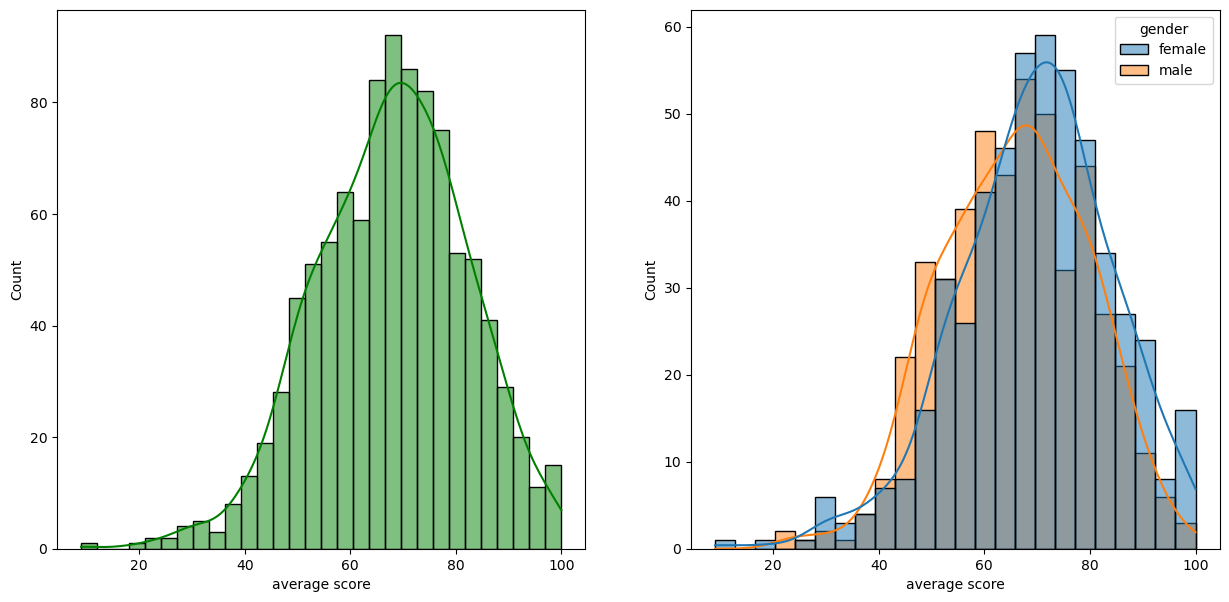

In [67]:
# gender
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True, hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

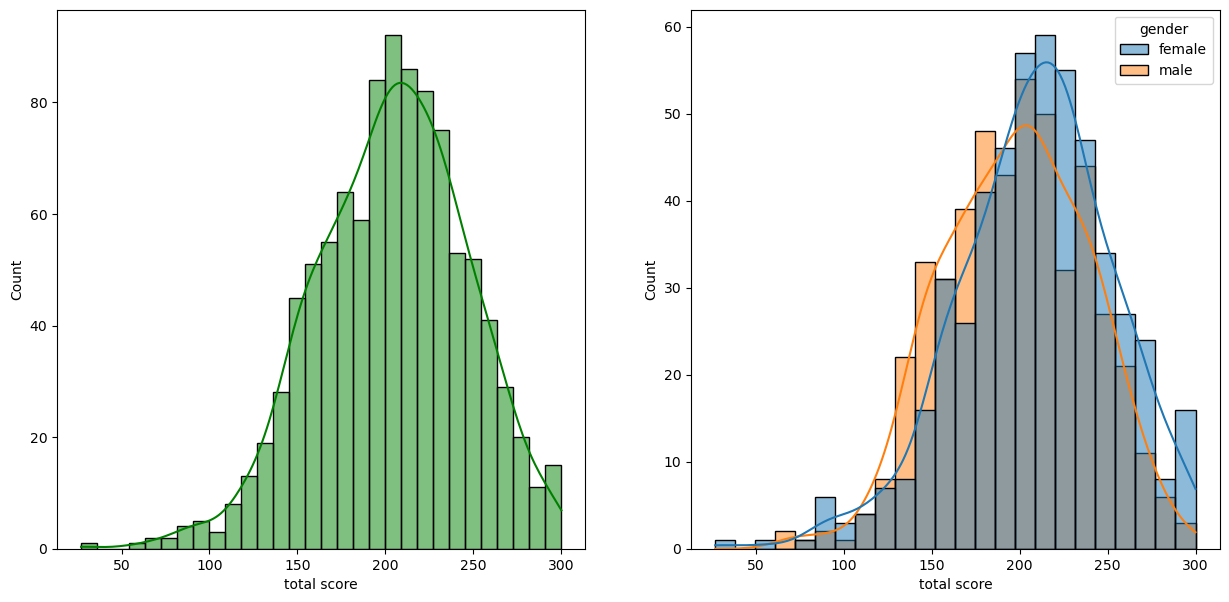

In [70]:
# gender
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')

**Insight**

* Female Students tend to perform well then male students.

<Axes: xlabel='average score', ylabel='Count'>

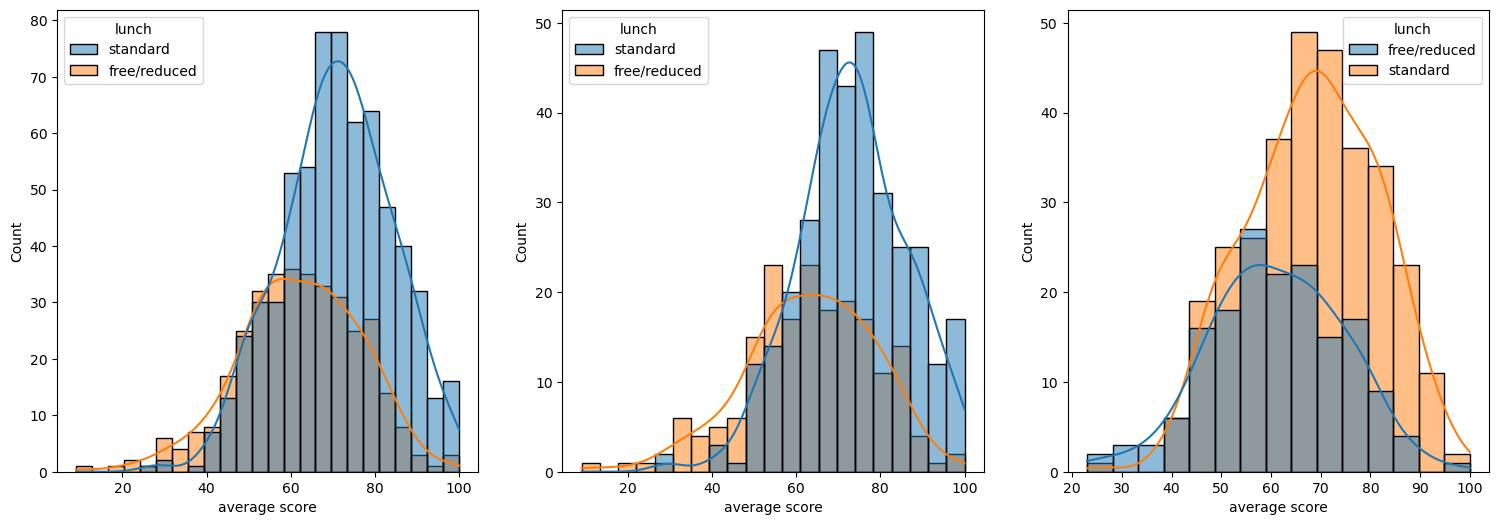

In [78]:
# lunch
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average score', kde=True, hue='lunch')


**Insight**

* Consuming a standard lunch can potentially improve exam performance for both males and females.
* A smaller number of students consumed free/reduced lunch.
* There may be a socio-economic disparity between students who consume standard lunch versus free/reduced lunch.

<Axes: xlabel='average score', ylabel='Count'>

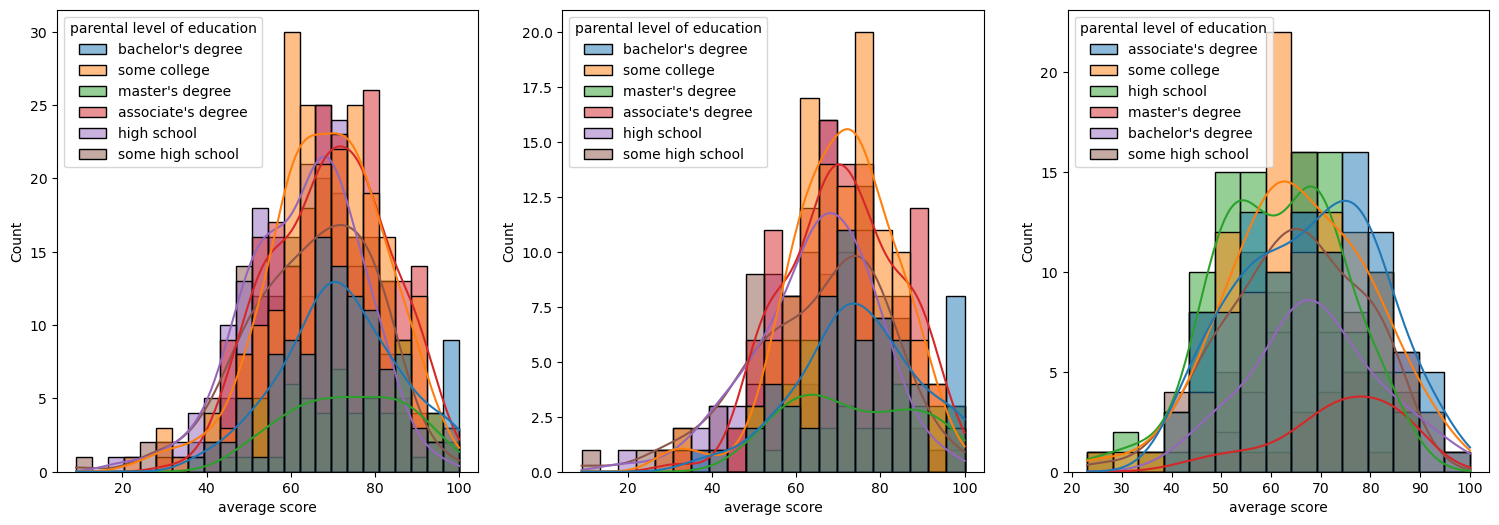

In [79]:
# parental level of education
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average score', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average score', kde=True, hue='parental level of education')


**Insight**

- Parent's education doesn't seem to have a significant impact on overall student performance based on the analysis.
- The second plot indicates that there is no apparent effect of parent's education on female students' exam scores.
- However, the third plot suggests that male students with parents who have associate's tend to perform better than those with parents with other levels of education.

<Axes: xlabel='average score', ylabel='Count'>

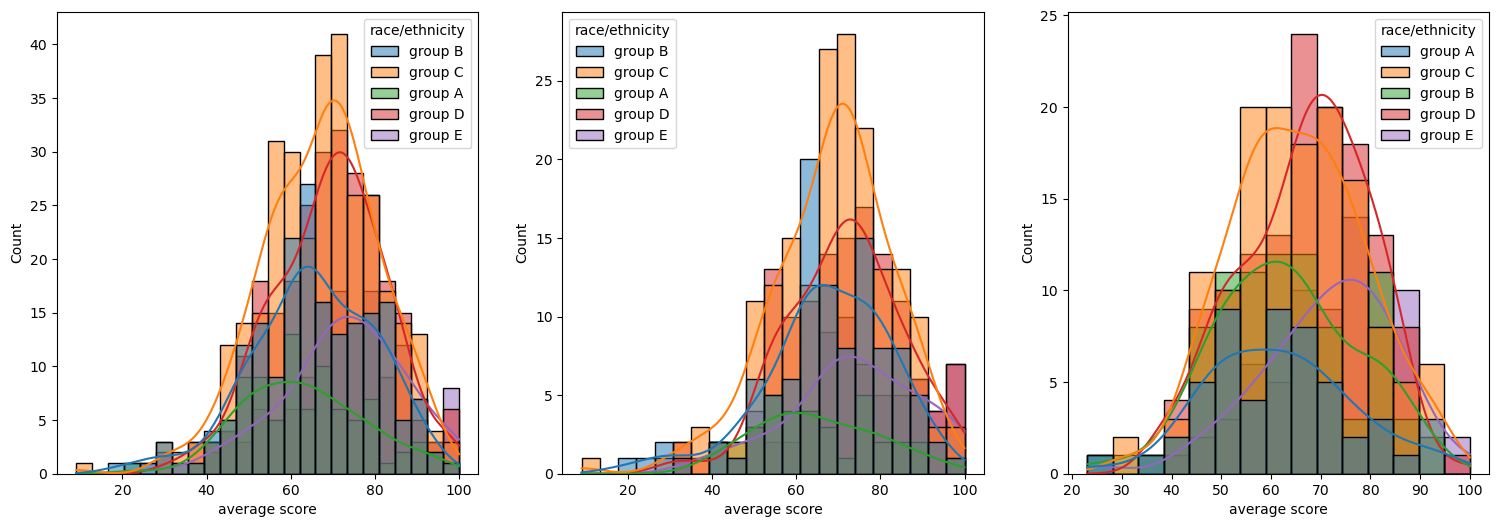

In [80]:
# race/ethinicity
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average score', kde=True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average score', kde=True, hue='race/ethnicity')


**Insight**

- Students of group A and group B tends for perform poorly in exam irresprctive of whether they are male or female


### Maximum score of students in all three subjects

<Axes: title={'center': 'WRITING SCORE'}, ylabel='writing score'>

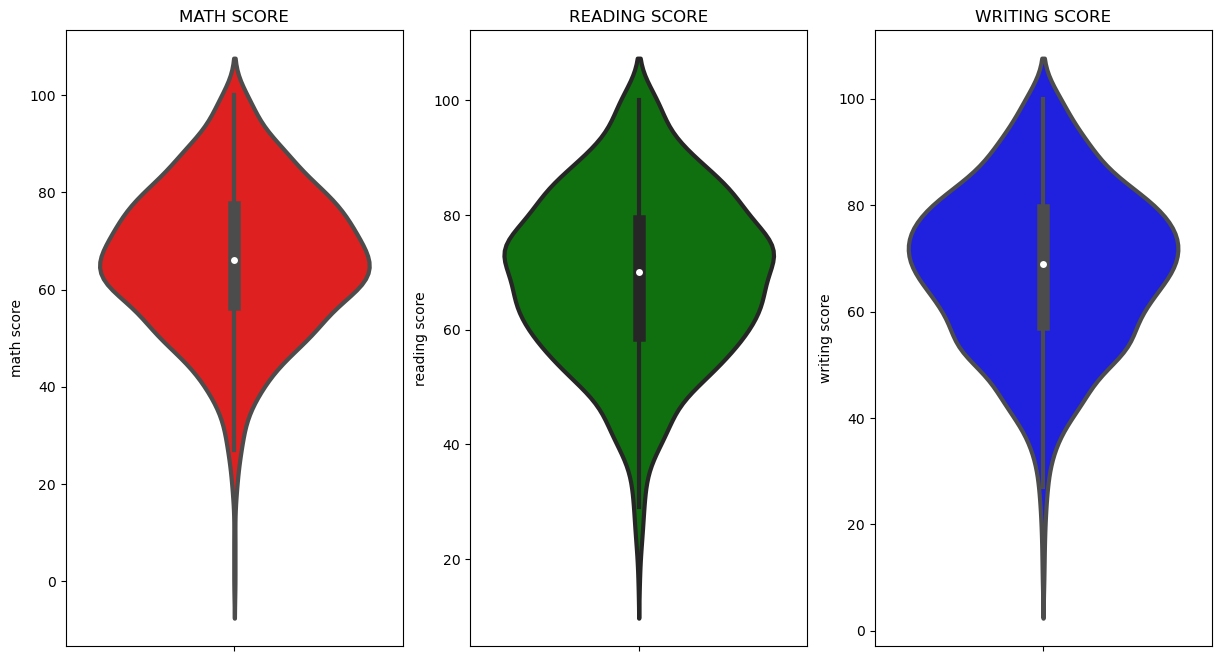

In [84]:
plt.figure(figsize=(20,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORE')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORE')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)


**Insights**
- Most students score between 60-80 in Maths, while in reading and writing, the majority score from 50-80.

### Multivariate analysis using pieplot

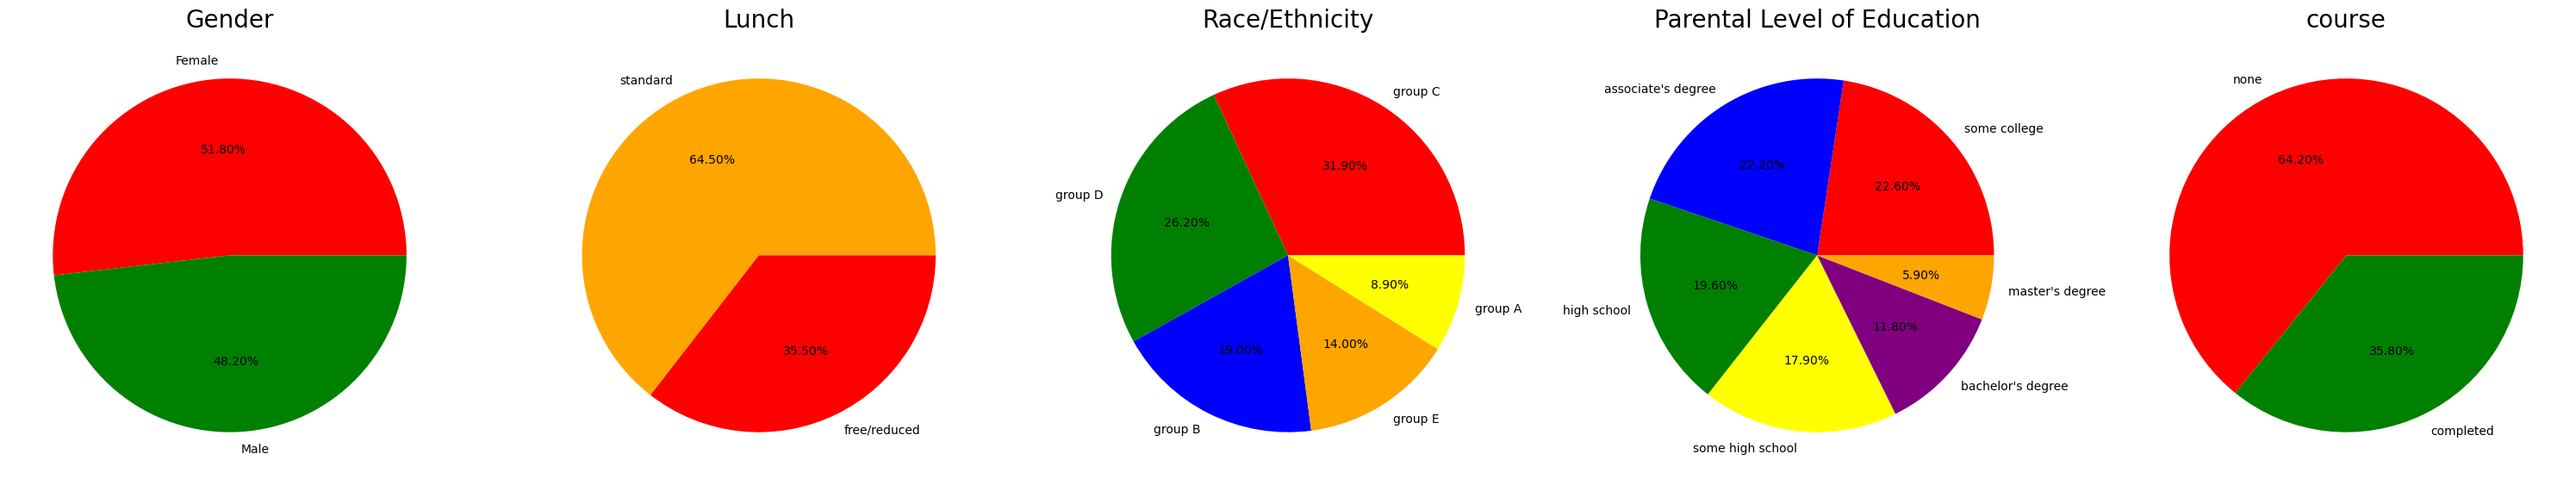

In [125]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['lunch'].value_counts()
labels =  'standard', 'free/reduced'
color = ['orange', 'red']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')




plt.subplot(1, 5, 3)
size = df['race/ethnicity'].value_counts()
labels = 'group C', 'group D', 'group B', 'group E', 'group A'
color = ['red', 'green', 'blue', 'orange', 'yellow']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')





plt.subplot(1, 5, 4)
size = df['parental level of education'].value_counts()
labels = "some college",  "associate's degree", "high school", "some high school", "bachelor's degree" , "master's degree"
color = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['test preparation course'].value_counts()
labels =  'none', 'completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('course', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()


**Insights**
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Feature Wise Visualization

#### Gender Column

#### Univariate Analysis

([<matplotlib.patches.Wedge at 0x18acd691810>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Female'),
  Text(0.06782226650507357, -1.1980818587083752, 'Male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.80%'),
  Text(0.03956298879462625, -0.698881084246552, '48.20%')])

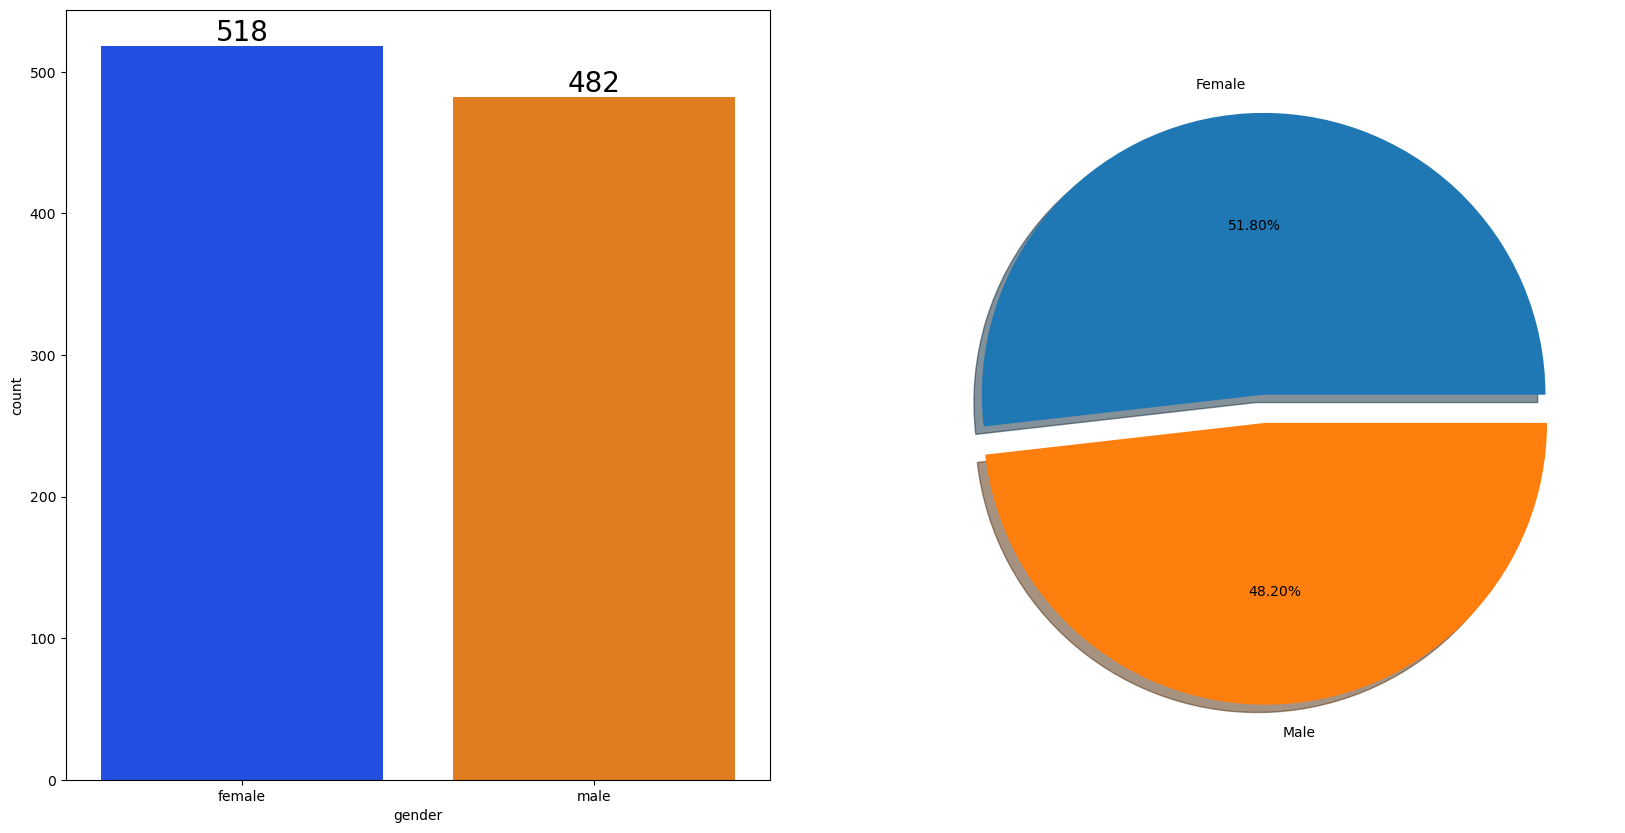

In [139]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)


plt.pie(x=df['gender'].value_counts(), labels=['Female', 'Male'], explode=[0, 0.1], autopct='%1.2f%%', shadow=True)

**Insight**

- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)